In [11]:
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 39)

caminho_arquivo = '../Black_Umbrella/dados/integracao_ocorr_diario_pre_processado.csv'
df = pd.read_csv(caminho_arquivo)

In [12]:
df.head(3)

,data,tavg,tmin,tmax,prcp,wdir,wspd,pres,distrito,latitude_distrito,longitude_distrito,ocorrencia,longitude_ocorrencia,latitude_ocorrencia,ocorrencia_target,distrito_encoded,dia,mes,ano,estacao_verao,estacao_outono,estacao_inverno,estacao_primavera
0,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Agua Rasa,-23.565372,-46.573697,sem_ocorrencia,-46.623993,-23.570186,0,0.098238,1,1,2013,1,0,0,0
1,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Alto De Pinheiros,-23.549906,-46.707642,sem_ocorrencia,-46.623993,-23.570186,0,0.168444,1,1,2013,1,0,0,0
2,2013-01-01,25.5,21.9,31.0,0.0,316.0,16.8,1017.511112,Anhanguera,-23.432908,-46.788534,sem_ocorrencia,-46.623993,-23.570186,0,0.068531,1,1,2013,1,0,0,0


In [13]:
X = df.drop(columns=['data', 'distrito', 'ocorrencia', 'longitude_ocorrencia', 'latitude_ocorrencia', 'ocorrencia_target'])
y = df['ocorrencia_target']

In [14]:
X.shape, y.shape

((427410, 17), (427410,))

In [15]:
# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o scaler
scaler = StandardScaler()  # ou MinMaxScaler()

# Ajustar o scaler aos dados de treinamento e transformar
X_train_scaled = scaler.fit_transform(X_train[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']])
X_test_scaled = scaler.transform(X_test[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']])

# Substituir os dados originais pelos dados escalados
X_train[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']] = X_train_scaled
X_test[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']] = X_test_scaled

# Aplicando class weights para balancear a importância das classes
# O modelo vai penalizar mais os erros da classe 1 (ocorrência) para focar em melhorar a recall e F1-score dessa classe.
# Criando e treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight={0: 1, 1: 3})
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     73868
           1       0.86      0.60      0.70     11614

    accuracy                           0.93     85482
   macro avg       0.90      0.79      0.83     85482
weighted avg       0.93      0.93      0.93     85482



In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

[[72696  1172]
 [ 4694  6920]]


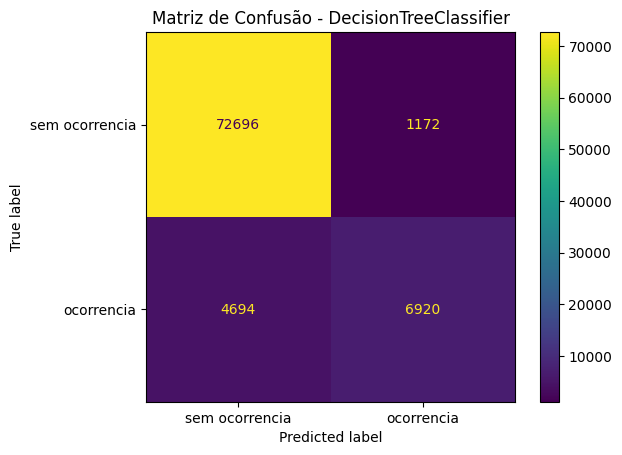

In [18]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz,
                                      display_labels=['sem ocorrencia', 'ocorrencia'])
visualizacao.plot()

plt.title("Matriz de Confusão - DecisionTreeClassifier");